In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 8

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.1406 - loss: 2.0655
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1841 - loss: 2.0446 - val_accuracy: 0.2384 - val_loss: 1.9044
Epoch 2/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2422 - loss: 1.9569
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2573 - loss: 1.9221 - val_accuracy: 0.3288 - val_loss: 1.7868
Epoch 3/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3125 - loss: 1.8246
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3131 - loss: 1.7992 - val_accuracy: 0.3930 - val_loss: 1.6414
Epoch 4/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2812 - loss: 1.7809
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5469 - loss: 1.0895
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5866 - loss: 1.0707 - val_accuracy: 0.7920 - val_loss: 0.7939
Epoch 26/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6016 - loss: 1.0385
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.5813 - loss: 1.0781 - val_accuracy: 0.7887 - val_loss: 0.7729
Epoch 27/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 1.0604
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 1.0677 - val_accuracy: 0.7907 - val_loss: 0.7491
Epoch 28/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5781 - loss: 1.0607
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 

 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 1.0435
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6453 - loss: 0.9414 - val_accuracy: 0.8879 - val_loss: 0.5697
Epoch 50/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6016 - loss: 0.9419
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6611 - loss: 0.9051 - val_accuracy: 0.8596 - val_loss: 0.5587
Epoch 51/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6641 - loss: 0.8246
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6611 - loss: 0.8899 - val_accuracy: 0.8771 - val_loss: 0.5610
Epoch 52/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 0.7398
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35

 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6484 - loss: 0.8511
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6565 - loss: 0.8929 - val_accuracy: 0.8899 - val_loss: 0.5059
Epoch 74/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7031 - loss: 0.8624
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.6925 - loss: 0.8550 - val_accuracy: 0.8893 - val_loss: 0.4993
Epoch 75/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6406 - loss: 0.8622
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6795 - loss: 0.8396 - val_accuracy: 0.8980 - val_loss: 0.4830
Epoch 76/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6328 - loss: 0.8948
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━

 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.8137
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6958 - loss: 0.7982 - val_accuracy: 0.8960 - val_loss: 0.4487
Epoch 98/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.8664
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6891 - loss: 0.8216 - val_accuracy: 0.8933 - val_loss: 0.4492
Epoch 99/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7109 - loss: 0.7880
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7010 - loss: 0.7815 - val_accuracy: 0.8872 - val_loss: 0.4472
Epoch 100/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6719 - loss: 0.8330
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/

Epoch 121/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6797 - loss: 0.7427
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7039 - loss: 0.7923 - val_accuracy: 0.9088 - val_loss: 0.4248
Epoch 122/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7266 - loss: 0.7400
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7054 - loss: 0.7717 - val_accuracy: 0.8980 - val_loss: 0.4314
Epoch 123/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7109 - loss: 0.7671
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7058 - loss: 0.7870 - val_accuracy: 0.9001 - val_loss: 0.4335
Epoch 124/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7891 - loss: 0.6948
Epoch 124: saving model to model/keypoint_classifier/keypoint_clas

Epoch 145/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6797 - loss: 0.8655
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7032 - loss: 0.7728 - val_accuracy: 0.9014 - val_loss: 0.4119
Epoch 146/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7656 - loss: 0.6946
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7212 - loss: 0.7817 - val_accuracy: 0.9068 - val_loss: 0.4020
Epoch 147/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6406 - loss: 0.9380
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7010 - loss: 0.7830 - val_accuracy: 0.8960 - val_loss: 0.4078
Epoch 148/1000
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.8722
Epoch 148: saving model to model/keypoint_classifier/keypoint_

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8918 - loss: 0.4160


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.00656847 0.6989198  0.04854181 0.00194381 0.18333077 0.00545762
 0.05387838 0.00135925]
1


# 混同行列

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


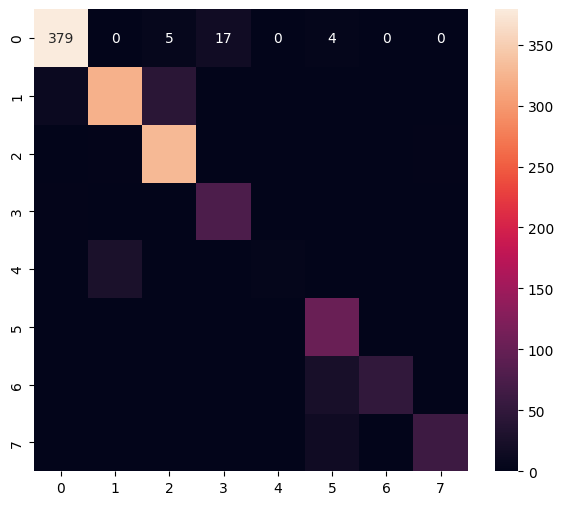

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       405
           1       0.91      0.86      0.89       375
           2       0.87      0.99      0.93       334
           3       0.82      0.97      0.89        78
           4       1.00      0.13      0.23        31
           5       0.70      0.98      0.82       105
           6       0.98      0.66      0.79        74
           7       0.97      0.78      0.87        79

    accuracy                           0.89      1481
   macro avg       0.90      0.79      0.79      1481
weighted avg       0.91      0.89      0.89      1481



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpmus2gxup/assets


INFO:tensorflow:Assets written to: /var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpmus2gxup/assets


Saved artifact at '/var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpmus2gxup'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  13220775888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13220789440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13221450448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13221458544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13221451152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13221460656: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1722989768.547459 16120026 tf_tfl_flatbuffer_helpers.cc:361] Ignored output_format.
W0000 00:00:1722989768.547473 16120026 tf_tfl_flatbuffer_helpers.cc:364] Ignored drop_control_dependency.


6728

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 75 µs, sys: 33 µs, total: 108 µs
Wall time: 107 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00656847 0.69891983 0.04854176 0.00194381 0.18333079 0.00545762
 0.05387836 0.00135925]
1
